<a href="https://colab.research.google.com/github/HyungJunGoo/ComputerVision/blob/main/Harris_Corner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Harris Corner Detection Algorithm

916 1680


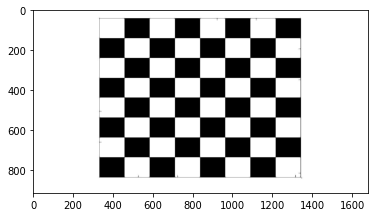

In [6]:
# Read image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

image = cv2.imread('screenshot.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(height, width)

plt.imshow(gray, cmap='gray')
plt.show()

#Harris Corner를 찾기 위한 함수

- window의 크기 설정에 따라 값이 달라질 수 있음
- k 값에 따라 2차 모멘트 함수의 적용에 따라 값이 달라질 수 있음
- Threshold 값 설정에 따라 조명 환경에 따라 값이 달라질 수 있음

In [10]:
def findCorners(img, window_size, k, threshold):

    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]

    cornerList = []
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)

    # 각 윈도우에서의 harris corner를 찾기 위한 과정
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            # Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]

            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            # 해리스 코터를 찾기 위한 과정 (k값이 여기서 필요)
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)

            # threshold 이상이 되는 값만 선정하여 뽑음
            if r > threshold:
                cornerList.append([x, y, r])
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)

    return color_img, cornerList

In [11]:
color_img, cornerList = findCorners(gray, 6, 0.06, 250)

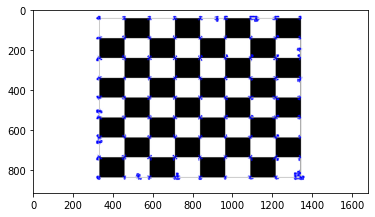

In [12]:
plt.imshow(color_img)
plt.show()